# 1. Introduction

### 1. To get started, please write 5 examples of the application of ML methods in life. What is the benefit of using machine learning methods in each of your examples? 

1. Медицинская диагностика: машинное обучение помогает выявлять заболевания на ранних стадиях, повышая точность и скорость диагностики.
2. Рекомендательные системы: в онлайн-магазинах и сервисах машины анализируют предпочтения пользователей, улучшая персонализацию и повышение удобства.
3. Обработка естественного языка: автоматический перевод и распознавание речи упрощают коммуникацию между людьми и технологиями.
4. Финансовый сектор: алгоритмы машинного обучения выявляют мошенничество и помогают в управлении рисками, повышая безопасность и устойчивость.
5. Автономное управление: в транспортных средствах ИИ анализирует данные с датчиков для принятия решений, улучшая безопасность и эффективность передвижения.  

Преимущество машинного обучения заключается в способности обрабатывать большие объемы данных и выявлять скрытые закономерности, что повышает точность и эффективность решений.

### 2. Use the classification of tasks in the introduction to decide which class you can assign to the tasks from the table above and to the 5 examples you provided. 

* Задачи классификации: медицинская диагностика, финансовый сектор, выберите, какое лекарство из доступных пациенту следует принять, распознавание бракованной продукции на производственной линии, решите, как разместить товары на полке в магазине, поиск сайтов по входному текстовому запросу, обнаружение аномалий в трафике сайта

* Задачи регрессии: рекомендательные системы, автономное управление, прогнозирование цены на жилье, прогнозировать, вернет ли клиент кредит, прогнозирование, когда пациенту необходимо принять лекарство

* Обучение с учителем: обработка естественного языка, выберите сегмент клиентов для промо-коммуникации, разбивайте покупателей магазина на сегменты, чтобы понимать различия в их поведении

### 3. Think about what the difference is between multiclass and multilabel.

Мультиклассовая (multiclass) классификация означает, что каждому объекту из множества входных данных присваивается ровно один класс из нескольких возможных. Классы взаимно исключают друг друга. Многометочная (multilabel) классификация предполагает, что один объект может иметь сразу несколько классов или меток одновременно.

### 4. Is an example case with house prices from the theory a classification of a regression problem? Is it possible to reduce the regression problem to classification?

Пример с ценами на жилье из теории относится к задаче регрессии, поскольку предсказывается непрерывное числовое значение — цена жилья. Однако такую задачу регрессии можно свести к задаче классификации, разбив диапазон цен на несколько дискретных категорий или интервалов (например, низкий, средний, высокий ценовой сегмент).

# 2. Introduction to Data Analysis

1. Import the libraries **pandas**, **numpy**, **sklearn**, **lightgbm**, **scipy**, **statsmodels**, **matplotlib**, **seaborn**. Use **pip install** if necessary.
   2. Load data from [kaggle](https://www.kaggle.com/competitions/two-sigma-connect-rental-listing-inquiries/data) using **pandas**. You only need the table data, which is in **train.json**.

In [2425]:
import pandas as pd
import numpy as np
import sklearn
import lightgbm as lgb
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2426]:
df = pd.read_json("data/train.json")

3. What is the size (the number of rows and columns) of your data? 

In [2427]:
df.shape

(49352, 15)

4. Print the list of columns. Which column is a target? 

In [2428]:
df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

target is price

5. Make a quick analysis of the data: use the methods **info()**, **describe()**, **corr()**. Explain the results of the outputs. Are there any empty columns? 

In [2429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [2430]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [2431]:
df.corr(numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


6. We'll work with only 3 features: 'bathrooms', 'bedrooms', 'interest_level' and with the target column 'price'. Create a dataframe with only these columns.

In [2432]:
main_cols_df = df[["bathrooms", "bedrooms", "interest_level", "price"]].copy()
main_cols_df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


# 3. Statistical Data Analysis

1. Plot a histogram to understand the distribution of the target. Is it all clear? 

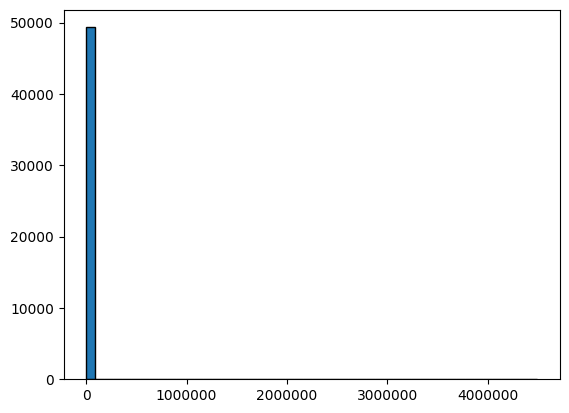

In [2433]:
plt.ticklabel_format(style="plain", axis="x")
plt.hist(main_cols_df["price"], bins=50, edgecolor='black')
plt.show()

Answer: it is not clear

2. The next step is boxplot(). What can you say about the target? Are there any outliers? 

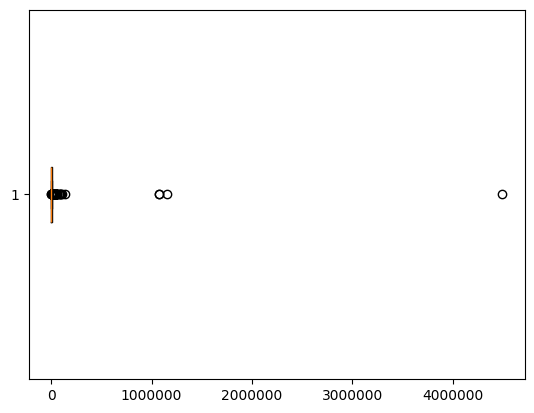

In [2434]:
plt.ticklabel_format(style="plain", axis="x")
plt.boxplot(main_cols_df["price"], vert=False)
plt.show()

There are 3 outliers

3. Drop the rows that are outside the 1 and 99 percentiles from the target column. 

In [2435]:
percentile_1 = main_cols_df["price"].quantile(0.01)
percentile_9 = main_cols_df["price"].quantile(0.99)
filtered_df = main_cols_df[(main_cols_df["price"] > percentile_1) & (main_cols_df["price"] < percentile_9)]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48343 entries, 4 to 124009
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       48343 non-null  float64
 1   bedrooms        48343 non-null  int64  
 2   interest_level  48343 non-null  object 
 3   price           48343 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ MB


4. Plot another histogram for price. Explain the result.

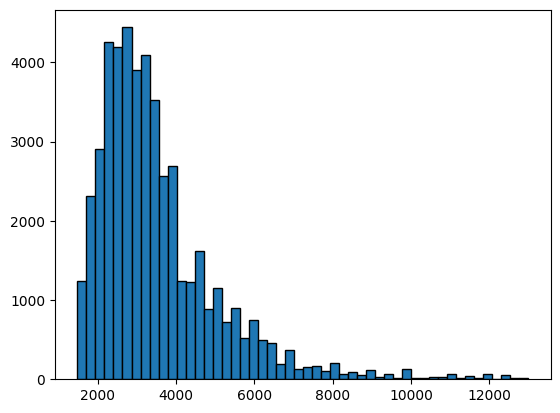

In [2436]:
plt.ticklabel_format(style="plain", axis="x")
plt.hist(filtered_df["price"], bins=50, edgecolor='black')
plt.show()

После удаления строк с очень маленькими и очень большими значениями (вне 1 и 99 процентилей) пропали выбросы и гистограмма стала лучше

# 4. Characteristics Analysis

1. What is the type of column 'interest_level'?

In [2437]:
filtered_df["interest_level"].dtype

dtype('O')

2. Print the values in this column. How many entries does each value contain? 

In [2438]:
filtered_df["interest_level"]

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 48343, dtype: object

In [2439]:
filtered_df["interest_level"].value_counts()

interest_level
low       33672
medium    11114
high       3557
Name: count, dtype: int64

3. Encode these values. For example, you can replace each value with 0, 1, or 2.

In [2440]:
pd.set_option("future.no_silent_downcasting", True)
filtered_df.loc[:,"interest_level"] = filtered_df["interest_level"].replace({"low": 0,"medium": 1, "high": 2}).copy()
filtered_df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,1,2400
6,1.0,2,0,3800
9,1.0,2,1,3495
10,1.5,3,1,3000
15,1.0,0,0,2795
...,...,...,...,...
124000,1.0,3,0,2800
124002,1.0,2,1,2395
124004,1.0,1,1,1850
124008,1.0,2,1,4195


4. Plot histograms for the features 'bathrooms', 'bedrooms'. Are there any outliers?

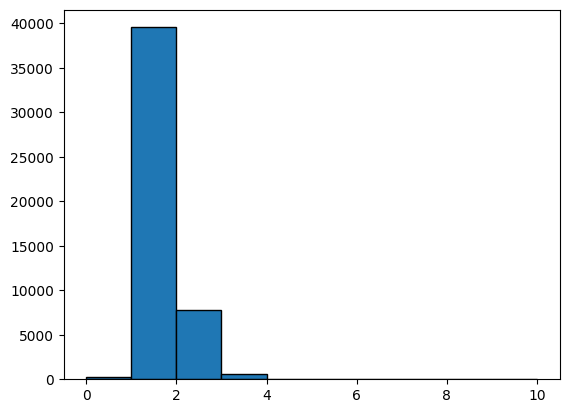

In [2441]:
plt.ticklabel_format(style="plain", axis="x")
plt.hist(filtered_df["bathrooms"], edgecolor='black')
plt.show()

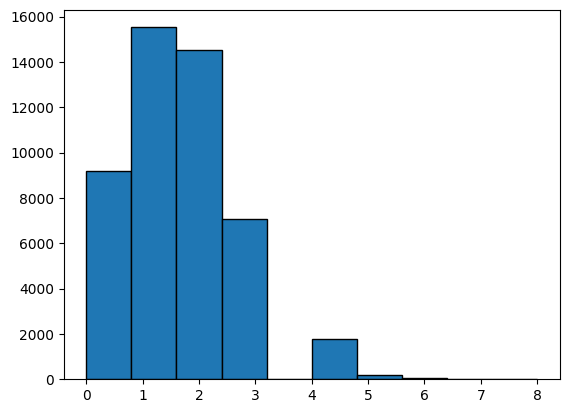

In [2442]:
plt.ticklabel_format(style="plain", axis="x")
plt.hist(filtered_df["bedrooms"], edgecolor='black')
plt.show()

У спален распредел и ванн не видны явные отклонения

# 5. Complex analysis

1. Plot a correlation matrix to understand the correlation between features and target. Plot a heat map for the correlation matrix. Is there a correlation?

In [2443]:
correlation_matrix = filtered_df.corr()
correlation_matrix

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517200,-0.062819,0.670808
bedrooms,0.517200,1.000000,0.051282,0.547310
interest_level,-0.062819,0.051282,1.000000,-0.199652
price,0.670808,0.547310,-0.199652,1.000000


<Axes: >

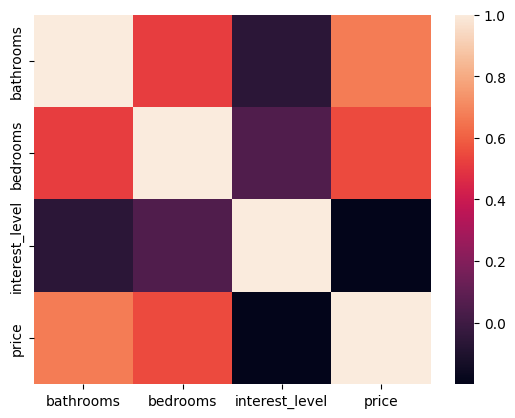

In [2444]:
sns.heatmap(correlation_matrix)

Сильная связь между количеством спален и ванн, а также заметная связь этих признаков с ценой, но очень слабая связь между уровнем интереса и ценой

2. Plot a scatterplot to visualize the correlation between the features and the target. You should return 3 plots where the X-axis is the target and the Y-axis is a feature.

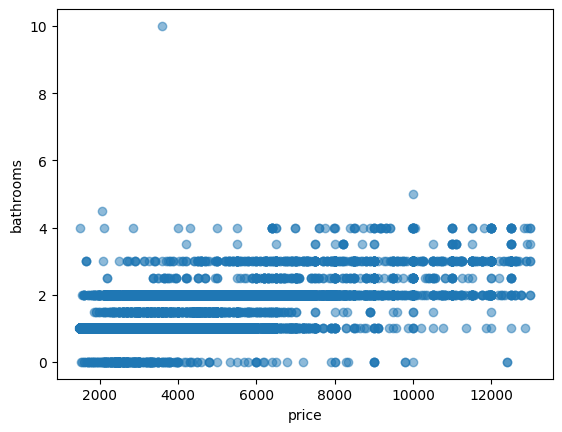

In [2445]:
plt.scatter(filtered_df["price"], filtered_df["bathrooms"], alpha=0.5)
plt.xlabel("price")
plt.ylabel("bathrooms")
plt.show()

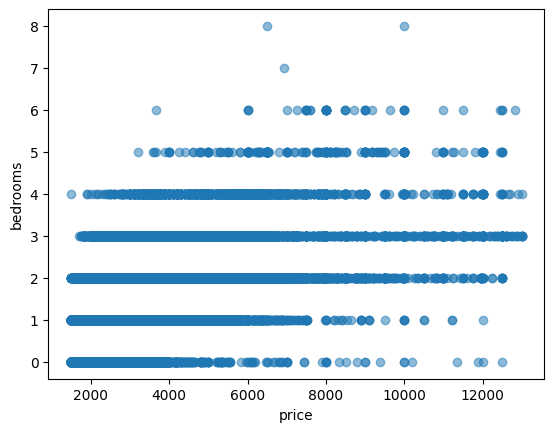

In [2446]:
plt.scatter(filtered_df["price"], filtered_df["bedrooms"], alpha=0.5)
plt.xlabel("price")
plt.ylabel("bedrooms")
plt.show()

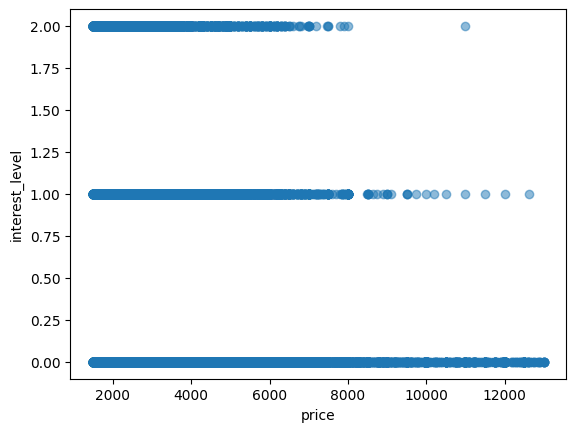

In [2447]:
plt.scatter(filtered_df["price"], filtered_df["interest_level"], alpha=0.5)
plt.xlabel("price")
plt.ylabel("interest_level")
plt.show()

# 4. Creating Features

1. This step is very broad. You can create as many features as you want. For example, you can add 3 new features that are squared: 'bathrooms_squared', 'bedrooms_squared', ''interest_level_squared'. Plot a correlation matrix with the new features. Are the new features more correlated with the target than the basic features? 

In [2448]:
df_squared = filtered_df.copy()
df_squared["bathrooms_squared"] = df_squared["bathrooms"] ** 2
df_squared["bedrooms_squared"] = df_squared["bedrooms"] ** 2
df_squared["interest_level_squared"] = df_squared["interest_level"] ** 2
df_squared

,bathrooms,bedrooms,interest_level,price,bathrooms_squared,bedrooms_squared,interest_level_squared
4,1.0,1,1,2400,1.00,1,1
6,1.0,2,0,3800,1.00,4,0
9,1.0,2,1,3495,1.00,4,1
10,1.5,3,1,3000,2.25,9,1
15,1.0,0,0,2795,1.00,0,0
...,...,...,...,...,...,...,...
124000,1.0,3,0,2800,1.00,9,0
124002,1.0,2,1,2395,1.00,4,1
124004,1.0,1,1,1850,1.00,1,1
124008,1.0,2,1,4195,1.00,4,1


In [2449]:
correlation_matrix = df_squared.corr()
correlation_matrix

,bathrooms,bedrooms,interest_level,price,bathrooms_squared,bedrooms_squared,interest_level_squared
bathrooms,1.000000,0.517200,-0.062819,0.670808,0.955906,0.548426,-0.058710
bedrooms,0.517200,1.000000,0.051282,0.547310,0.478497,0.928282,0.040125
interest_level,-0.062819,0.051282,1.000000,-0.199652,-0.067757,0.047048,0.943959
price,0.670808,0.547310,-0.199652,1.000000,0.646949,0.544612,-0.182283
bathrooms_squared,0.955906,0.478497,-0.067757,0.646949,1.000000,0.521951,-0.061563
bedrooms_squared,0.548426,0.928282,0.047048,0.544612,0.521951,1.000000,0.036408
interest_level_squared,-0.058710,0.040125,0.943959,-0.182283,-0.061563,0.036408,1.000000


Значения корреляции новых признаков немного уменьшились, а значит новые функции не соответствуют поставленной цели в большей степени, чем базовые признаки

2. To train the model here, we will not use your new features. Remember this example and use it in Lecture 2. To train the model, we will only consider the features 'bathrooms' and 'bedrooms'.
3. Read this [Sklearn info about PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).
4. To use PolynomialFeatures, we first need to split the data into training and test samples. We have already done this for you, please read the training and test data. 

In [2450]:
train_df = filtered_df.copy()
train_df.drop("interest_level", axis=1, inplace=True)
test_df = pd.read_json("data/test.json")
test_df = test_df[["bathrooms", "bedrooms", "price"]]

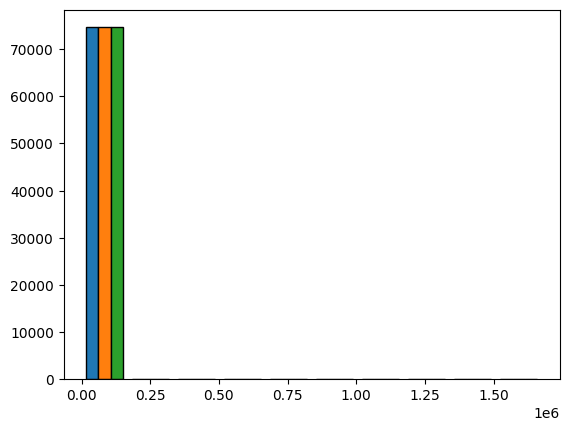

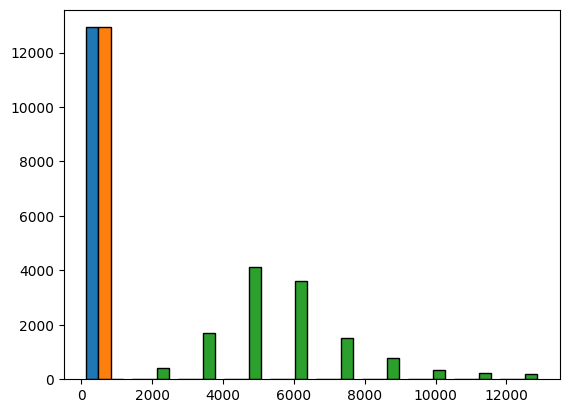

In [2451]:
plt.hist(test_df, edgecolor="black")
plt.show()

percentile_1 = test_df["price"].quantile(0.01)
percentile_9 = test_df["price"].quantile(0.99)
test_df = test_df[(test_df["price"] > percentile_1) & (test_df["price"] < percentile_9)].copy()

test_df = test_df[(test_df["bathrooms"] < 7) & (test_df["bathrooms"] > 1)]

percentile_1 = test_df["bedrooms"].quantile(0.01)
percentile_9 = test_df["bedrooms"].quantile(0.99)
test_df = test_df[(test_df["bedrooms"] > percentile_1) & (test_df["bedrooms"] < percentile_9)].copy()

plt.hist(test_df, edgecolor="black")
plt.show()

5. Initialize PolynomialFeatures() with a degree of 10. 

In [2452]:
poly = PolynomialFeatures(degree=10)

6. Apply PolynomialFeatures() to fit and transform your training and test data.

In [2453]:
x_train = train_df[["bedrooms", "bathrooms"]]
x_test = test_df[["bedrooms", "bathrooms"]]
y_train = train_df["price"]
y_test = test_df["price"]

x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

# 5. Now you need to train 3 models: linear regression, decision tree and naive model. We will use them as black boxes without deep understanding.

In [2454]:
dummy_model = DummyRegressor()

1. Results table 
      1. Create two empty Pandas DataFrames with columns 'model', 'train', 'test'. Let's call the first one result_MAE and the second one result_RMSE. We will fill these tables with the results of the models.

In [2455]:
result_MAE = pd.DataFrame({
    "model": pd.Series(dtype="object"),
    "train": pd.Series(dtype="float"),
    "test":  pd.Series(dtype="float")
})

result_RMSE = pd.DataFrame({
    "model": pd.Series(dtype="object"),
    "train": pd.Series(dtype="float"),
    "test":  pd.Series(dtype="float")
})

2. Linear Regression 
      1. Initialize linear regression from **sklearn** with no parameters. 
      2. Fit your model and make predictions on training and test features. Save it as new columns in data.
      3. Compute MAE (Mean Absolute Error) on training and test targets.
      4. Calculate RMSE (Root Mean Square Error) on training and test objectives.
      5. Insert your metrics into tables *result_MAE* and *result_RMSE* with model name 'linear_regression'.

In [2456]:
model_linear = LinearRegression()
model_linear.fit(x_poly_train, y_train)
y_train_pred = model_linear.predict(x_poly_train)
y_test_pred = model_linear.predict(x_poly_test)

train_df["y_train_pred_linear"] = y_train_pred
test_df["y_test_pred_linear"] = y_test_pred

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

result_MAE = pd.concat(
    [result_MAE, pd.DataFrame([{"model": "linear_regression", "train": mae_train, "test": mae_test}])],
    ignore_index=True
)
result_RMSE = pd.concat(
    [result_RMSE, pd.DataFrame([{"model": "linear_regression", "train": rmse_train, "test": rmse_test}])],
    ignore_index=True
)

print(result_MAE)
print(result_RMSE)

               model       train         test
0  linear_regression  753.679393  1328.607416
               model        train         test
0  linear_regression  1070.669027  8854.928226


   3. Decision Tree
      1. Initialize decision tree regressor from sklearn with fixed random_state=21.
      2. Fit it to train features and train target and make prediction on train and test features. Save it as a new column in data. 
      3. Compute MAE (Mean Absolute Error) on train and test targets.
      4. Compute RMSE (Root Mean Square Error) on train and test targets.
      5. Insert your metrics into tables *result_MAE* and *result_RMSE* with model name 'decision_tree'.

In [2457]:
model_tree = DecisionTreeRegressor(random_state=21)
model_tree.fit(x_poly_train, y_train)
y_train_pred = model_tree.predict(x_poly_train)
y_test_pred = model_tree.predict(x_poly_test)

train_df["y_train_pred_tree"] = y_train_pred
test_df["y_test_pred_tree"] = y_test_pred

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

result_MAE = pd.concat(
    [result_MAE, pd.DataFrame([{"model": "decision_tree", "train": mae_train, "test": mae_test}])],
    ignore_index=True
)
result_RMSE = pd.concat(
    [result_RMSE, pd.DataFrame([{"model": "decision_tree", "train": rmse_train, "test": rmse_test}])],
    ignore_index=True
)

print(result_MAE)
print(result_RMSE)

               model       train         test
0  linear_regression  753.679393  1328.607416
1      decision_tree  753.675997  1249.272817
               model        train         test
0  linear_regression  1070.669027  8854.928226
1      decision_tree  1070.598967  1683.215440


   4. Naive Models
      1. Calculate the mean and median of 'price' on the training and test data and create a column with these values. 
      2. Calculate the MAE on the training and test targets between your target and the calculated mean and median. 
      3. Calculate the RMSE on the training and test targets between your target and the calculated mean and median. 
      4. Insert your metrics into tables result_MAE and result_RMSE with model names 'naive_mean' and 'naive_median'.

In [2458]:
train_mean = train_df["price"].mean()
test_mean = test_df["price"].mean()
train_median = train_df["price"].median()
test_median = test_df["price"].median()

train_df["train_mean"] = train_mean
test_df["test_mean"] = test_mean
train_df["train_median"] = train_median
test_df["test_median"] = test_median

mae_train = mean_absolute_error(train_df["price"], train_df["train_mean"])
mae_test = mean_absolute_error(test_df["price"], test_df["test_mean"])
rmse_train = np.sqrt(mean_squared_error(train_df["price"], train_df["train_median"]))
rmse_test = np.sqrt(mean_squared_error(test_df["price"], test_df["test_median"]))

result_MAE = pd.concat(
    [result_MAE, pd.DataFrame([{"model": "naive_mean", "train": mae_train, "test": mae_test}])],
    ignore_index=True
)
result_RMSE = pd.concat(
    [result_RMSE, pd.DataFrame([{"model": "naive_mean", "train": rmse_train, "test": rmse_test}])],
    ignore_index=True
)
result_MAE = pd.concat(
    [result_MAE, pd.DataFrame([{"model": "naive_median", "train": mae_train, "test": mae_test}])],
    ignore_index=True
)
result_RMSE = pd.concat(
    [result_RMSE, pd.DataFrame([{"model": "naive_median", "train": rmse_train, "test": rmse_test}])],
    ignore_index=True
)

# 5. Compare the results 

1. Print your final result_MAE and result_RMSE tables. 
2. Which is the best model?

In [2459]:
print(result_MAE)
print(result_RMSE)

               model        train         test
0  linear_regression   753.679393  1328.607416
1      decision_tree   753.675997  1249.272817
2         naive_mean  1134.361473  1453.251543
3       naive_median  1134.361473  1453.251543
               model        train         test
0  linear_regression  1070.669027  8854.928226
1      decision_tree  1070.598967  1683.215440
2         naive_mean  1631.719953  1986.903723
3       naive_median  1631.719953  1986.903723


The best model is decision_tree